## How to know the memory usage of a dataframe

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('videos_data/drinks.csv')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [5]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [6]:
drinks.memory_usage()

Index                             80
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [7]:
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

## How to make a dataframe smaller and faster

In [8]:
drinks.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [9]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [10]:
drinks['continent'] = drinks.continent.astype('category')

In [11]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [12]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [13]:
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [14]:
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [15]:
drinks['country'] = drinks.country.astype('category')

In [16]:
drinks.country.cat.reorder_categories

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.categorical.CategoricalAccessor object at 0x000001508C4B3128>>

In [17]:
drinks.country.dtypes

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
                  'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria',
                  ...
                  'United Arab Emirates', 'United Kingdom', 'Uruguay',
                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen',
                  'Zambia', 'Zimbabwe'],
                 ordered=False)

In [18]:
# use the categorical dtype when you have object column of string with few unique value
drinks.memory_usage(deep=True)

Index                              80
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

## How to set a logical ordering in pandas

In [19]:
df = pd.DataFrame({'id':[100,101,102,103],'quality':['good','very good','good','excellent']})

In [20]:
df

,id,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [21]:
df.sort_values('quality')

,id,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [22]:
# Convert to ordered categorical type with custom ordering
df['quality'] = df.quality.astype('category',ordered=True, categories = ['good','very good','excellent'])

C:\Users\oluwatobiloba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [103]:
# the new way to do it now
from pandas.api.types import CategoricalDtype
qualitycat = CategoricalDtype(['good','very good', 'excellent'],ordered=True)
df['quality'] = df.quality.astype(qualitycat)

In [104]:
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [24]:
df.sort_values('quality')

,id,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [25]:
df.loc[df.quality > 'good',:]

,id,quality
1,101,very good
3,103,excellent


In [26]:
# the new way of setting logical ordering(note the future warning above)
df = pd.DataFrame({'id':[200,201,202,203],'quality':['good','very good','good','excellent']})

In [27]:
df['quality'] = df.quality.astype('category')

In [28]:
df.sort_values('quality')

,id,quality
3,203,excellent
0,200,good
2,202,good
1,201,very good


In [29]:
df.quality.cat.reorder_categories(['good','very good', 'excellent'],ordered=True,inplace=True)

In [30]:
df.sort_values('quality')

,id,quality
0,200,good
2,202,good
1,201,very good
3,203,excellent


In [31]:
df

,id,quality
0,200,good
1,201,very good
2,202,good
3,203,excellent


In [32]:
df.loc[df.quality > 'good',:]

,id,quality
1,201,very good
3,203,excellent


## How to randomly sample rows in pandas

In [33]:
ufo = pd.read_csv('videos_data/ufo.csv')

In [34]:
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
2281,Medford,NaN,LIGHT,OR,7/15/1972 22:00
9570,Beckley,NaN,OTHER,WV,8/15/1996 20:30
14205,Lancaster,RED,FIREBALL,CA,8/15/1999 16:30


In [35]:
ufo.sample(n=3, random_state=33)

,City,Colors Reported,Shape Reported,State,Time
12142,Diamond Bar,NaN,OVAL,CA,9/18/1998 21:00
8035,Richmond,NaN,NaN,VA,4/19/1995 21:45
13035,Colorado Springs,NaN,FORMATION,CO,2/18/1999 23:27


In [36]:
ufo.sample(frac=0.6, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00
9834,Poulsbo,NaN,NaN,WA,12/21/1996 0:00
7335,Zebulon,NaN,OTHER,NC,5/15/1994 15:30
563,Mohave,NaN,LIGHT,CA,8/15/1959 21:00
6504,Calistoga,NaN,SPHERE,CA,2/15/1991 15:00
14907,Tehachapi,BLUE,CHEVRON,CA,10/21/1999 13:00
12277,Del Mar,NaN,FIREBALL,CA,10/1/1998 16:00
7004,Creston,NaN,SPHERE,NC,4/14/1993 21:00


## How to get non-overlapping random  samples

In [37]:
train = ufo.sample(frac=0.75, random_state=99)

In [38]:
test = ufo.loc[~ufo.index.isin(train.index),:]

In [39]:
train.head()

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00


In [40]:
test.head()

,City,Colors Reported,Shape Reported,State,Time
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
11,Waterloo,NaN,FIREBALL,AL,6/1/1939 20:00
13,Keokuk,NaN,OVAL,IA,7/7/1939 2:00


## How to create a dummy or indicator variable

In [41]:
train = pd.read_csv('videos_data/titanic_train.csv')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train['sex_male'] = train.Sex.map({'male':1,'female':0})

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [45]:
pd.get_dummies(train.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [46]:
pd.get_dummies(train.Sex).iloc[:,1:]

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [47]:
pd.get_dummies(train.Sex, prefix='sex').iloc[:,1:]

,sex_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [48]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
pd.get_dummies(train.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [50]:
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:]

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


## How to concatenate a two or more dataframe 

In [51]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:,1:]

In [52]:
train = pd.concat([train,embarked_dummies],axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


## How to do indicator variable for more series

In [54]:
train = pd.read_csv('videos_data/titanic_train.csv')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
pd.get_dummies(train,columns=['Sex','Embarked'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,0,1,0,0


In [57]:
pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0


## How to work with date and time in pandas

In [58]:
ufo = pd.read_csv('videos_data/ufo.csv')

In [59]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [60]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [61]:
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00


In [62]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [63]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
5        15
6         0
7         0
8        17
9         0
10       21
11       20
12       20
13        2
14       13
15       11
16        0
17       22
18        1
19       23
20       15
21        0
22        0
23       11
24       10
25       12
26       12
27       11
28       12
29       10
         ..
18211    18
18212    18
18213    19
18214     0
18215     9
18216    16
18217    19
18218    20
18219    20
18220    20
18221    20
18222    21
18223    22
18224    23
18225    10
18226    22
18227    22
18228     4
18229    11
18230    20
18231    20
18232    20
18233    21
18234    22
18235    23
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [64]:
ufo.Time.dt.weekday_name

0           Sunday
1           Monday
2           Sunday
3           Monday
4          Tuesday
5         Saturday
6         Saturday
7        Wednesday
8         Thursday
9          Tuesday
10          Sunday
11        Thursday
12          Friday
13          Friday
14          Sunday
15       Wednesday
16       Wednesday
17          Monday
18       Wednesday
19          Friday
20         Tuesday
21          Sunday
22          Sunday
23          Friday
24        Saturday
25        Saturday
26        Saturday
27          Sunday
28        Thursday
29          Friday
           ...    
18211     Thursday
18212     Thursday
18213     Thursday
18214       Friday
18215       Friday
18216       Friday
18217       Friday
18218       Friday
18219       Friday
18220       Friday
18221       Friday
18222       Friday
18223       Friday
18224       Friday
18225     Saturday
18226     Saturday
18227     Saturday
18228       Sunday
18229       Sunday
18230       Sunday
18231       Sunday
18232       

In [65]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
5        258
6        166
7        197
8        289
9        166
10       227
11       152
12       181
13       188
14       152
15       183
16        56
17       152
18       196
19       120
20       152
21       227
22       227
23       288
24         1
25         1
26         1
27        93
28       153
29       182
        ... 
18211    363
18212    363
18213    363
18214    364
18215    364
18216    364
18217    364
18218    364
18219    364
18220    364
18221    364
18222    364
18223    364
18224    364
18225    365
18226    365
18227    365
18228    366
18229    366
18230    366
18231    366
18232    366
18233    366
18234    366
18235    366
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [66]:
ts = pd.to_datetime('4/1/1999')

In [67]:
ts

Timestamp('1999-04-01 00:00:00')

In [68]:
ufo.loc[ufo.Time >= ts,:]

,City,Colors Reported,Shape Reported,State,Time
13264,"Encinitas: along I-5, from encinitas to oceans...",ORANGE,CIRCLE,CA,1999-04-01 00:00:00
13265,Fenton,NaN,FLASH,MO,1999-04-01 15:30:00
13266,Orlando,NaN,SPHERE,FL,1999-04-01 20:00:00
13267,Warrensburg,NaN,RECTANGLE,NY,1999-04-01 20:00:00
13268,San Diego,NaN,CIRCLE,CA,1999-04-01 22:45:00
13269,New York City,NaN,OTHER,NY,1999-04-01 23:00:00
13270,Tijeras,NaN,SPHERE,NM,1999-04-02 22:03:00
13271,Natchez,ORANGE,TRIANGLE,MS,1999-04-02 22:30:00
13272,St. Louis Park,NaN,EGG,MN,1999-04-02 22:30:00
13273,Coral Gables,NaN,NaN,FL,1999-04-03 16:30:00


In [69]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [70]:
(ufo.Time.max() - ufo.Time.min()).days

25781

## How to sort a dataframe by year or day

In [71]:
ufo['Year'] = ufo.Time.dt.year

In [72]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [73]:
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1971     118
1972     162
1973     227
1974     261
1975     312
1976     281
1977     258
1978     326
1979     237
1980     244
1981     175
1982     186
1983     148
1984     177
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

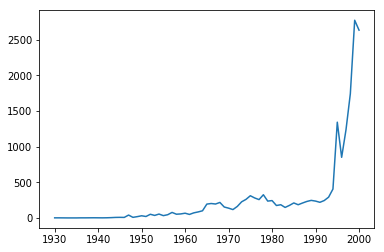

In [74]:
%matplotlib inline
ufo.Year.value_counts().sort_index().plot()

## How to find and remove duplicate rows in pandas 

In [75]:
use_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_table('videos_data\movieusers.txt', sep='|', header=None, names=use_cols, index_col='user_id')

In [76]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [77]:
users.shape

(943, 4)

In [78]:
users.zip_code.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919     True
920    False
921    False
922     True
923    False
924    False
925    False
926    False
927    False
928     True
929     True
930    False
931    False
932    False
933    False
934     True
935    False
936    False
937     True
938    False
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [79]:
users.zip_code.duplicated().sum()

148

In [80]:
users.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [81]:
users.duplicated().sum()

7

In [82]:
users.loc[users.duplicated(),:]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [83]:
users.loc[users.duplicated(keep='first'),:]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [84]:
users.loc[users.duplicated(keep='last'),:]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [85]:
users.loc[users.duplicated(keep=False),:]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [86]:
users.drop_duplicates(keep='first').shape

(936, 4)

In [87]:
users.drop_duplicates(keep='last').shape

(936, 4)

In [88]:
users.drop_duplicates(keep=False).shape

(929, 4)

In [89]:
users.duplicated(subset=['age','zip_code']).sum()

16

In [90]:
users.drop_duplicates(subset=['age','zip_code']).shape

(927, 4)

In [91]:
users.drop_duplicates(subset=['age','zip_code'],inplace=True)

In [92]:
users.shape

(927, 4)

## How to avoid setting with copyWarning (Always copy after selection)

In [93]:
movies = pd.read_csv('videos_data/imdb_1000.csv')

In [94]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [95]:
top_movies = movies.loc[movies.star_rating >= 9,:]

In [96]:
top_movies 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [97]:
top_movies.loc[0,'duration'] = 150

C:\Users\oluwatobiloba\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [98]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [99]:
# Always explicitly copy a dataframe after selection if they will be used later
top_movies = movies.loc[movies.star_rating >= 9,:].copy()

In [100]:
top_movies.loc[0,'duration'] = 150